In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
from IPython.display import display
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

### TIER clasification

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
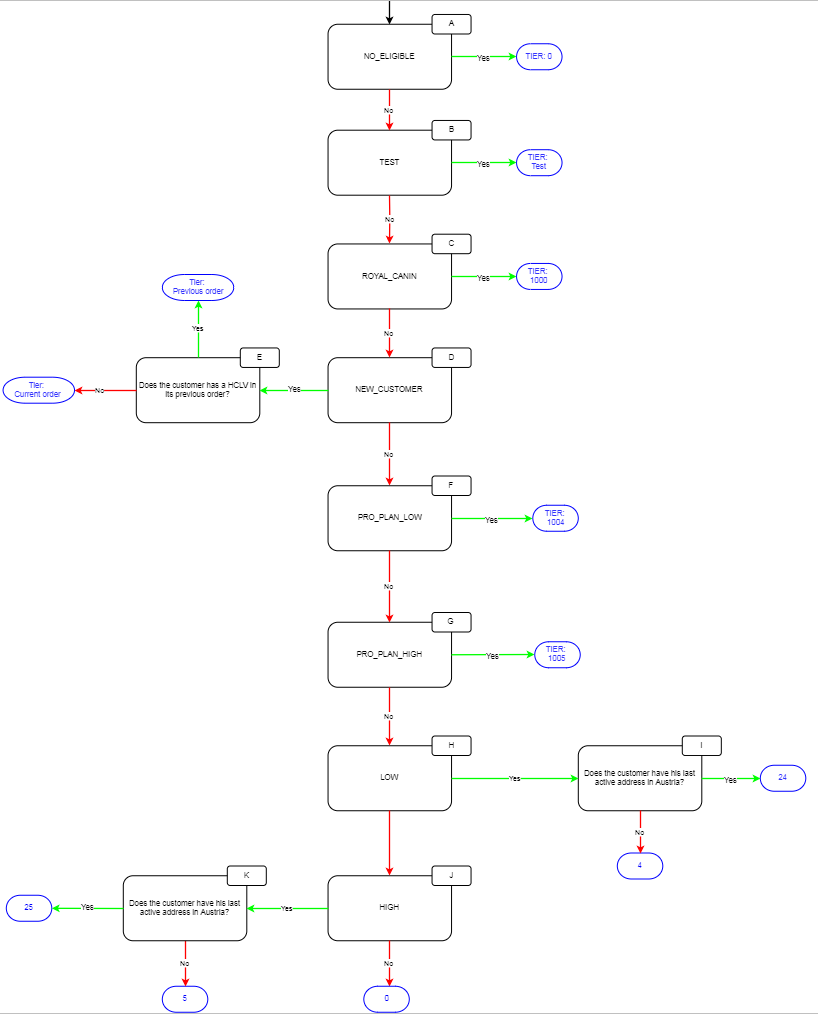

### Invitation type - BOX clasification

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
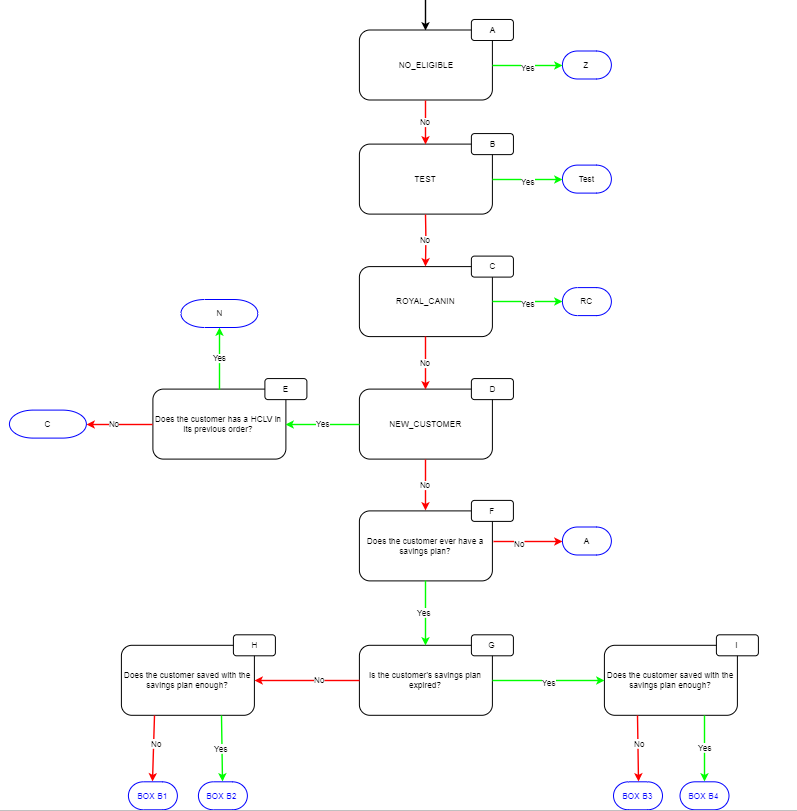

In [2]:
data = pd.read_csv('comparison_eligibilities_per_site_01082018.dsv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 6 columns):
OLD_TIER               2678 non-null float64
OLD_BOX                2678 non-null object
NEW_TIER               2751 non-null float64
NEW_BOX                2751 non-null object
K_REGISTRATION_S_ID    2790 non-null int64
AMOUNT                 2790 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 130.9+ KB


In [4]:
data

,OLD_TIER,OLD_BOX,NEW_TIER,NEW_BOX,K_REGISTRATION_S_ID,AMOUNT
0,4.0,A,0.0,Z,4,141685
1,5.0,A,5.0,A,21,14800
2,4.0,A,4.0,A,15,26636
3,4.0,B3,4.0,B4,1,34058
4,0.0,Z,0.0,Z,101,681033
5,5.0,B3,0.0,Z,18,1009
6,4.0,A,5.0,A,1,73357
7,4.0,B4,4.0,B3,1,8433
8,5.0,B1,5.0,B2,1,1562
9,6.0,C,0.0,Z,16,109996


In [5]:
#Exclude rows with NaN values (null)
data = data[~data.apply(lambda x: x.isnull().any(), axis=1)]

In [6]:
len(data)

2678

In [7]:
data['AMOUNT'].sum()

15819124

In [8]:
#Not eligible in OLD elig
data[data['OLD_TIER'] == 0]['AMOUNT'].sum()

4261003

In [9]:
#Not segmented in OLD elig
data[data['OLD_TIER'].isnull()]['AMOUNT'].sum()

0

In [10]:
# % Not eligible in OLD elig
np.round(data[(data['OLD_TIER'] == 0) | (data['OLD_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

26.94

In [11]:
#Not eligible in NEW elig
data[data['NEW_TIER'] == 0]['AMOUNT'].sum()

11750225

In [12]:
#Not segmented in NEW elig
data[data['NEW_TIER'].isnull()]['AMOUNT'].sum()

0

In [13]:
# % Not eligible in NEW elig
np.round(data[(data['NEW_TIER'] == 0) | (data['NEW_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

74.28

In [14]:
crosstab = data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()

In [15]:
crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)

In [16]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [17]:
# Relative values of transition between old and new eligibility
crosstab_rel.style.apply(highlight_max, axis=1)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,84.23,12.96,0.4,1.66,0.31,0.01,0.09,0.34,0
4.0,40.05,36.16,16.55,6.69,0.01,0,0.3,0.21,0.04
5.0,57.59,6.35,28.93,7,0,0.01,0.05,0.04,0.03
6.0,86.02,0.04,0.03,13.91,0,0,0,0,0
24.0,39.44,0.21,0.08,10.15,38.53,11.6,0,0,0
25.0,53.01,0.06,0.25,11,6.37,29.32,0,0,0
1000.0,13.63,5.87,1.23,29,0,0,50.26,0,0
1004.0,20.48,2.3,0.36,0.66,0,0,0,70.79,5.42
1005.0,18.79,1.64,1.78,1.85,0,0,0,39.88,36.05


In [18]:
crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)

In [19]:
crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)

In [20]:
crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100

In [21]:
crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100

In [22]:
# Absolute values of transition between old and new eligibility
crosstab.fillna(0).astype(int)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,3589017,552400,17148,70684,13136,490,3707,14369,52,4261003,26
4.0,1054823,952528,435836,176074,268,54,7802,5532,945,2633862,16
5.0,1040836,114830,522855,126549,14,234,857,747,533,1807455,11
6.0,6024536,2583,1821,974361,49,22,27,35,5,7003439,44
24.0,21626,113,46,5563,21126,6359,1,0,0,54834,0
25.0,14076,16,66,2921,1691,7785,0,0,0,26555,0
1000.0,2321,1000,210,4936,0,0,8556,0,0,17023,0
1004.0,2189,246,38,71,0,0,0,7567,579,10690,0
1005.0,801,70,76,79,0,0,0,1700,1537,4263,0


In [23]:
np.sort(data['K_REGISTRATION_S_ID'].unique())[:27]

array([ 1,  2,  3,  4,  7,  8,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32], dtype=int64)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
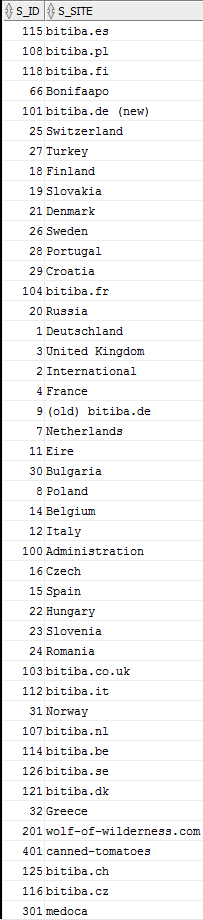

In [24]:
for i in np.sort(data['K_REGISTRATION_S_ID'].unique())[:27]:
    print('                                                SITE ' + str(i) + '                                                           ')
    cus_data = data[data['K_REGISTRATION_S_ID'] == i]
    crosstab = cus_data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()
    crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)
    display(crosstab_rel.style.apply(highlight_max, axis=1))
    crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)
    crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)
    crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100
    crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100
    display(crosstab.fillna(0).astype(int))
    print('Percentage of non-eligible customers with the old routine: ',
          np.round(cus_data[(cus_data['OLD_TIER'] == 0) | (cus_data['OLD_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('Percentage of non-eligible customers with the new routine: ',
          np.round(cus_data[(cus_data['NEW_TIER'] == 0) | (cus_data['NEW_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('_______________________________________________________________________________________________________________________')
    print('')

                                                SITE 1                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,81.92,13.2,0.55,2.83,1.44,0.05,0,0,0
4.0,40.91,35.72,13.9,9.42,0.03,0.01,0,0,0
5.0,60.11,6.58,22.64,10.63,0,0.03,0,0,0
6.0,81.48,0.02,0.01,18.48,0,0,0,0,0
24.0,39.49,0.16,0.07,10.14,38.58,11.56,0,0,0
25.0,53.13,0.05,0.19,11.02,6.36,29.25,0,0,0
1000.0,12.07,5.17,3.45,27.59,0,0,51.72,0,0
1004.0,15.38,7.69,0,0,0,0,0,53.85,23.08
1005.0,11.11,0,0,0,0,0,0,55.56,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,743614,119855,5003,25665,13102,488,27,20,0,907774,19
4.0,310217,270903,105420,71408,256,49,29,18,1,758301,16
5.0,413046,45231,155552,73029,13,233,2,2,1,687109,15
6.0,1738125,494,287,394149,49,22,0,0,0,2133126,46
24.0,21551,89,37,5535,21052,6310,0,0,0,54574,1
25.0,14007,13,51,2906,1676,7713,0,0,0,26366,0
1000.0,7,3,2,16,0,0,30,0,0,58,0
1004.0,4,2,0,0,0,0,0,14,6,26,0
1005.0,1,0,0,0,0,0,0,5,3,9,0


Percentage of non-eligible customers with the old routine:  19.88
Percentage of non-eligible customers with the new routine:  70.95
_______________________________________________________________________________________________________________________

                                                SITE 2                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,87.32,10.25,0.47,1.82,0.07,0,0.02,0.07,0
4.0,49.36,30.1,13.86,6.54,0.02,0.02,0.09,0.02,0
5.0,57.35,8.14,28.23,6.25,0,0,0,0.03,0
6.0,88.62,0.03,0.02,11.33,0,0,0,0,0
24.0,24.14,0,0,10.34,27.59,37.93,0,0,0
25.0,19.23,0,7.69,0,3.85,69.23,0,0,0
1000.0,0,9.09,18.18,27.27,0,0,45.45,0,0
1004.0,66.67,0,0,0,0,0,0,33.33,0
1005.0,0,0,0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,5232,614,28,109,4,0,1,4,0,5992,21
4.0,2681,1635,753,355,1,1,5,1,0,5432,19
5.0,1881,267,926,205,0,0,0,1,0,3280,11
6.0,11713,4,2,1498,0,0,0,0,0,13217,47
24.0,7,0,0,3,8,11,0,0,0,29,0
25.0,5,0,2,0,1,18,0,0,0,26,0
1000.0,0,1,2,3,0,0,5,0,0,11,0
1004.0,4,0,0,0,0,0,0,2,0,6,0
1005.0,0,0,0,0,0,0,0,0,2,2,0


Percentage of non-eligible customers with the old routine:  21.4
Percentage of non-eligible customers with the new routine:  76.88
_______________________________________________________________________________________________________________________

                                                SITE 3                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,74.49,23.54,1.1,0.88,0,0,0,0
4.0,52.33,14.97,28.75,3.94,0,0,0,0
5.0,69.01,5.3,21.9,3.79,0,0,0,0
6.0,93.57,0.02,0.02,6.38,0,0,0,0
24.0,55.56,7.41,0,0,18.52,18.52,0,0
25.0,62.5,0,3.12,3.12,3.12,28.12,0,0
1000.0,0,0,12.5,25,0,0,62.5,0
1004.0,33.33,0,0,0,0,0,0,66.67
1005.0,100,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,312387,98703,4602,3681,3,1,1,3,419381,31
4.0,85381,24422,46914,6431,0,2,5,2,163157,12
5.0,81999,6295,26016,4502,1,0,1,0,118814,8
6.0,593339,123,151,40475,0,0,0,0,634088,47
24.0,15,2,0,0,5,5,0,0,27,0
25.0,20,0,1,1,1,9,0,0,32,0
1000.0,0,0,1,2,0,0,5,0,8,0
1004.0,2,0,0,0,0,0,0,4,6,0
1005.0,1,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  31.4
Percentage of non-eligible customers with the new routine:  80.35
_______________________________________________________________________________________________________________________

                                                SITE 4                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,74.72,20.29,0.21,2,0,0,0,2.78,0.01
4.0,40.56,38.12,14.41,5.53,0,0,0,1.17,0.2
5.0,62.6,5.27,27.71,4.03,0,0,0,0.23,0.16
6.0,89.37,0.04,0.02,10.56,0,0,0,0,0
24.0,20,10,5,15,35,15,0,0,0
25.0,50,0,0,30,10,10,0,0,0
1000.0,0,25,0,25,0,0,50,0,0
1004.0,20.48,2.29,0.35,0.67,0,0,0,70.84,5.37
1005.0,18.65,1.66,1.8,1.85,0,0,0,39.99,36.05


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,384659,104445,1088,10287,0,0,3,14297,51,514830,20
4.0,189631,178231,67372,25856,0,0,2,5490,935,467517,18
5.0,202874,17073,89802,13048,0,0,0,738,529,324064,13
6.0,1028244,479,269,121488,0,0,0,35,4,1150519,46
24.0,4,2,1,3,7,3,0,0,0,20,0
25.0,5,0,0,3,1,1,0,0,0,10,0
1000.0,0,1,0,1,0,0,2,0,0,4,0
1004.0,2170,243,37,71,0,0,0,7506,569,10596,0
1005.0,787,70,76,78,0,0,0,1687,1521,4219,0


Percentage of non-eligible customers with the old routine:  20.83
Percentage of non-eligible customers with the new routine:  73.16
_______________________________________________________________________________________________________________________

                                                SITE 7                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,81.58,14.29,0.42,2.37,0,0,1.33,0,0
4.0,38.38,39.78,12.7,6.11,0,0,3.03,0,0
5.0,55.06,6.28,33.6,4.6,0,0,0.47,0,0
6.0,86.23,0.05,0.04,13.68,0,0,0.01,0,0
24.0,22.22,0,0,11.11,38.89,22.22,5.56,0,0
25.0,30.77,7.69,15.38,0,15.38,30.77,0,0,0
1000.0,13.64,5.87,1.21,29.05,0,0,50.23,0,0
1004.0,0,0,0,0,0,0,0,66.67,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,223697,39185,1163,6489,1,0,3658,1,0,274194,22
4.0,97846,101393,32371,15567,0,0,7730,0,1,254908,21
5.0,100386,11455,61259,8382,0,0,848,0,0,182330,15
6.0,406898,215,205,64542,0,0,26,0,0,471886,39
24.0,4,0,0,2,7,4,1,0,0,18,0
25.0,4,1,2,0,2,4,0,0,0,13,0
1000.0,2302,991,204,4905,0,0,8481,0,0,16883,1
1004.0,0,0,0,0,0,0,0,2,1,3,0
SUM_NEW_TIER,831137,153240,95204,99887,10,8,20744,3,2,1200235,100


Percentage of non-eligible customers with the old routine:  22.85
Percentage of non-eligible customers with the new routine:  69.25
_______________________________________________________________________________________________________________________

                                                SITE 8                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0
OLD_TIER,,,,,,,
0.0,89.09,9.1,0.48,1.32,0,0,0
4.0,26.66,46.8,22.29,4.25,0,0,0
5.0,34.04,5.78,55.3,4.88,0,0,0
6.0,79.37,0.06,0.08,20.49,0,0,0
24.0,14.29,21.43,0,14.29,35.71,14.29,0
25.0,57.14,0,0,14.29,0,28.57,0
1000.0,50,12.5,0,0,0,0,37.5


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,231706,23668,1250,3443,3,0,2,260072,33
4.0,45292,79518,37880,7215,1,0,2,169908,22
5.0,22423,3806,36426,3217,0,0,1,65873,8
6.0,218113,174,217,56299,0,0,1,274804,35
24.0,2,3,0,2,5,2,0,14,0
25.0,4,0,0,1,0,2,0,7,0
1000.0,4,1,0,0,0,0,3,8,0
SUM_NEW_TIER,517544,107170,75773,70177,9,4,9,770686,100
NEW_DIST%,67,13,9,9,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  33.75
Percentage of non-eligible customers with the new routine:  67.15
_______________________________________________________________________________________________________________________

                                                SITE 9                                                           


NEW_TIER,0.0
OLD_TIER,
0.0,100


NEW_TIER,0.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,
0.0,1,1,100
SUM_NEW_TIER,1,1,100
NEW_DIST%,100,100,10000


Percentage of non-eligible customers with the old routine:  100.0
Percentage of non-eligible customers with the new routine:  100.0
_______________________________________________________________________________________________________________________

                                                SITE 11                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,89.27,6.71,0.16,3.85,0.01,0,0.01
4.0,46.19,43.44,3.74,6.61,0.01,0,0.01
5.0,62.86,7.81,24.96,4.37,0,0,0
6.0,86.1,0.06,0.01,13.84,0,0,0
24.0,25,0,0,0,25,50,0
25.0,66.67,0,0,0,0,33.33,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,13188,991,23,569,1,0,1,14773,22
4.0,5706,5366,462,816,1,0,1,12352,18
5.0,3266,406,1297,227,0,0,0,5196,7
6.0,29590,20,2,4755,0,0,0,34367,51
24.0,1,0,0,0,1,2,0,4,0
25.0,2,0,0,0,0,1,0,3,0
SUM_NEW_TIER,51753,6783,1784,6367,3,3,2,66695,100
NEW_DIST%,77,10,2,9,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  22.15
Percentage of non-eligible customers with the new routine:  77.6
_______________________________________________________________________________________________________________________

                                                SITE 12                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,73.41,24.23,0.35,2.01,0,0,0,0
4.0,32.89,37.35,23.05,6.71,0,0,0,0
5.0,50.36,7.64,36.44,5.56,0,0,0,0
6.0,85.31,0.05,0.03,14.6,0,0,0,0
24.0,41.38,24.14,3.45,17.24,10.34,3.45,0,0
25.0,50,0,0,16.67,8.33,25,0,0
1000.0,0,0,0,100,0,0,0,0
1004.0,0,0,0,0,0,0,0,100
1005.0,66.67,0,0,0,0,0,0,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,182289,60170,863,5002,1,0,0,0,248325,26
4.0,62708,71215,43946,12796,0,0,0,0,190665,20
5.0,51800,7859,37482,5715,0,0,1,1,102858,11
6.0,335243,215,131,57375,0,0,0,0,392964,42
24.0,12,7,1,5,3,1,0,0,29,0
25.0,6,0,0,2,1,3,0,0,12,0
1000.0,0,0,0,1,0,0,0,0,1,0
1004.0,0,0,0,0,0,0,0,2,2,0
1005.0,2,0,0,0,0,0,0,1,3,0


Percentage of non-eligible customers with the old routine:  26.56
Percentage of non-eligible customers with the new routine:  67.61
_______________________________________________________________________________________________________________________

                                                SITE 14                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,78.29,19.54,0.21,1.85,0,0,0.03,0.08,0
4.0,28.49,44.3,19.67,7.41,0,0,0.08,0.05,0.01
5.0,47.45,9,38.3,5.2,0,0,0.02,0.02,0
6.0,83.72,0.1,0.05,16.14,0,0,0,0,0
24.0,37.5,12.5,12.5,12.5,25,0,0,0,0
25.0,0,0,0,0,0,100,0,0,0
1000.0,13.33,6.67,2.22,17.78,0,0,60,0,0
1004.0,14.29,2.38,0,0,0,0,0,80.95,2.38
1005.0,36.36,0,0,4.55,0,0,0,27.27,31.82


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,40640,10144,110,958,0,0,15,41,0,51908,28
4.0,10539,16386,7276,2740,1,0,28,17,4,36991,19
5.0,10734,2037,8666,1177,0,0,4,5,1,22624,12
6.0,61718,72,35,11897,0,0,0,0,0,73722,39
24.0,3,1,1,1,2,0,0,0,0,8,0
25.0,0,0,0,0,0,1,0,0,0,1,0
1000.0,6,3,1,8,0,0,27,0,0,45,0
1004.0,6,1,0,0,0,0,0,34,1,42,0
1005.0,8,0,0,1,0,0,0,6,7,22,0


Percentage of non-eligible customers with the old routine:  28.0
Percentage of non-eligible customers with the new routine:  66.71
_______________________________________________________________________________________________________________________

                                                SITE 15                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,80.64,15.78,0.76,2.81,0,0,0,0,0
4.0,41.29,26.19,26.02,6.5,0,0,0,0,0
5.0,65.65,3.9,25.59,4.86,0,0,0,0,0
6.0,86.21,0.04,0.04,13.7,0,0,0,0,0
24.0,33.33,16.67,8.33,16.67,16.67,8.33,0,0,0
25.0,50,0,0,0,7.14,42.86,0,0,0
1000.0,40,0,0,0,0,0,60,0,0
1004.0,50,0,16.67,0,0,0,0,33.33,0
1005.0,100,0,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,160600,31434,1521,5604,5,0,0,2,1,199167,25
4.0,59658,37843,37599,9389,1,1,1,1,0,144493,18
5.0,58836,3495,22931,4355,0,1,0,0,0,89618,11
6.0,299267,149,144,47560,0,0,0,0,1,347121,44
24.0,4,2,1,2,2,1,0,0,0,12,0
25.0,7,0,0,0,1,6,0,0,0,14,0
1000.0,2,0,0,0,0,0,3,0,0,5,0
1004.0,3,0,1,0,0,0,0,2,0,6,0
1005.0,1,0,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  25.52
Percentage of non-eligible customers with the new routine:  74.11
_______________________________________________________________________________________________________________________

                                                SITE 16                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,76.86,19.17,0.36,3.6,0,0
4.0,26.69,51.47,14.12,7.73,0,0
5.0,44.25,5.06,44.52,6.17,0,0
6.0,76.92,0.05,0.03,23.01,0,0
24.0,55.56,0,11.11,0,22.22,11.11
25.0,0,0,20,0,40,40


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,61606,15364,291,2886,1,1,80149,23
4.0,18051,34810,9550,5225,0,0,67636,19
5.0,14961,1711,15052,2085,0,0,33809,9
6.0,124240,73,41,37169,0,0,161523,47
24.0,5,0,1,0,2,1,9,0
25.0,0,0,1,0,2,2,5,0
SUM_NEW_TIER,218863,51958,24936,47365,5,4,343131,100
NEW_DIST%,63,15,7,13,0,0,100,0


Percentage of non-eligible customers with the old routine:  23.36
Percentage of non-eligible customers with the new routine:  63.78
_______________________________________________________________________________________________________________________

                                                SITE 18                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,86.03,10.83,0.25,2.89,0
4.0,36.63,42.42,12.34,8.61,0
5.0,51.44,8.79,31.43,8.34,0
6.0,84.55,0.05,0.03,15.37,0
24.0,50,0,0,0,50
25.0,50,0,0,50,0


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,36914,4649,106,1240,0,42909,17
4.0,18719,21682,6305,4403,0,51109,21
5.0,15965,2729,9755,2590,0,31039,13
6.0,95894,53,33,17436,0,113416,47
24.0,1,0,0,0,1,2,0
25.0,1,0,0,1,0,2,0
SUM_NEW_TIER,167494,29113,16199,25670,1,238477,100
NEW_DIST%,70,12,6,10,0,100,0


Percentage of non-eligible customers with the old routine:  17.99
Percentage of non-eligible customers with the new routine:  70.23
_______________________________________________________________________________________________________________________

                                                SITE 19                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,76.13,22.54,0.48,0.81,0.03,0
4.0,37.31,35.61,23.39,3.65,0.04,0
5.0,48.58,3.69,43.58,4.15,0,0
6.0,93.05,0.04,0.02,6.88,0,0
24.0,26.47,2.94,2.94,5.88,32.35,29.41
25.0,36,0,20,0,8,36


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,16069,4758,101,171,7,0,21106,22
4.0,5382,5138,3375,526,6,0,14427,15
5.0,4394,334,3942,375,0,0,9045,9
6.0,46566,21,11,3445,0,0,50043,52
24.0,9,1,1,2,11,10,34,0
25.0,9,0,5,0,2,9,25,0
SUM_NEW_TIER,72429,10252,7435,4519,26,19,94680,100
NEW_DIST%,76,10,7,4,0,0,100,0


Percentage of non-eligible customers with the old routine:  22.29
Percentage of non-eligible customers with the new routine:  76.5
_______________________________________________________________________________________________________________________

                                                SITE 20                                                           


NEW_TIER,0.0,4.0,5.0,6.0,1004.0
OLD_TIER,,,,,
0.0,93.43,3.08,0.04,3.45,0
4.0,35.3,55,2.05,7.65,0
5.0,31.55,2.67,60.96,4.81,0
6.0,61.83,0,0.06,38.11,0
1004.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,2518,83,1,93,0,2695,35
4.0,466,726,27,101,0,1320,17
5.0,118,10,228,18,0,374,4
6.0,2010,0,2,1239,0,3251,42
1004.0,0,0,0,0,1,1,0
SUM_NEW_TIER,5112,819,258,1451,1,7641,100
NEW_DIST%,66,10,3,18,0,100,1


Percentage of non-eligible customers with the old routine:  35.27
Percentage of non-eligible customers with the new routine:  66.9
_______________________________________________________________________________________________________________________

                                                SITE 21                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0
OLD_TIER,,,,,
0.0,75.84,21.95,0.22,1.98,0
4.0,33.36,46.16,14.7,5.79,0
5.0,46.34,8.11,40.95,4.6,0
6.0,87.86,0.08,0.07,11.99,0
24.0,50,0,0,0,50
25.0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,43666,12640,128,1139,0,57573,20
4.0,19198,26562,8457,3330,0,57547,20
5.0,18841,3296,16652,1872,0,40661,14
6.0,114580,104,91,15642,0,130417,45
24.0,2,0,0,0,2,4,0
25.0,0,0,0,1,0,1,0
SUM_NEW_TIER,196287,42602,25328,21984,2,286203,100
NEW_DIST%,68,14,8,7,0,100,0


Percentage of non-eligible customers with the old routine:  20.12
Percentage of non-eligible customers with the new routine:  68.58
_______________________________________________________________________________________________________________________

                                                SITE 22                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,77.25,20.77,0.83,1.13,0.02,0,0
4.0,20.42,33.93,41.8,3.84,0.01,0,0.01
5.0,31.86,4.37,60.67,3.1,0,0,0
6.0,88.42,0.06,0.07,11.45,0,0,0
24.0,14.29,0,9.52,9.52,33.33,33.33,0
25.0,20,0,0,6.67,20,53.33,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,25482,6850,275,373,6,0,0,32986,29
4.0,2916,4844,5968,548,1,0,1,14278,12
5.0,1992,273,3793,194,0,0,0,6252,5
6.0,51317,34,39,6646,0,0,0,58036,52
24.0,3,0,2,2,7,7,0,21,0
25.0,3,0,0,1,3,8,0,15,0
SUM_NEW_TIER,81713,12001,10077,7764,17,15,1,111588,100
NEW_DIST%,73,10,9,6,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  29.56
Percentage of non-eligible customers with the new routine:  73.23
_______________________________________________________________________________________________________________________

                                                SITE 23                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,85.33,12.55,0.09,2.04,0,0
4.0,19.18,65.5,8.63,6.69,0,0
5.0,21.82,15.69,57.65,4.84,0,0
6.0,80.13,0.07,0.03,19.78,0,0
24.0,22.22,0,0,11.11,66.67,0
25.0,10,10,10,30,10,30


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,11016,1620,11,263,0,0,12910,23
4.0,2272,7758,1022,793,0,0,11845,21
5.0,1365,982,3607,303,0,0,6257,11
6.0,18507,16,6,4568,0,0,23097,42
24.0,2,0,0,1,6,0,9,0
25.0,1,1,1,3,1,3,10,0
SUM_NEW_TIER,33163,10377,4647,5931,7,3,54128,100
NEW_DIST%,61,19,8,10,0,0,100,0


Percentage of non-eligible customers with the old routine:  23.85
Percentage of non-eligible customers with the new routine:  61.27
_______________________________________________________________________________________________________________________

                                                SITE 24                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,90.45,7.8,0.44,1.31,0,0
4.0,15.81,48.25,31.89,4.04,0,0.01
5.0,19.75,3.96,72.56,3.73,0,0
6.0,88.21,0.05,0.03,11.71,0,0
24.0,0,0,0,40,40,20


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,15313,1321,75,221,0,0,16930,22
4.0,1676,5115,3380,428,0,1,10600,14
5.0,704,141,2586,133,0,0,3564,4
6.0,39134,22,14,5194,0,0,44364,58
24.0,0,0,0,2,2,1,5,0
SUM_NEW_TIER,56827,6599,6055,5978,2,2,75463,100
NEW_DIST%,75,8,8,7,0,0,100,0


Percentage of non-eligible customers with the old routine:  22.43
Percentage of non-eligible customers with the new routine:  75.3
_______________________________________________________________________________________________________________________

                                                SITE 25                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,1005.0
OLD_TIER,,,,,,,,
0.0,93.42,3.06,0.92,2.59,0,0,0,0
4.0,13.86,64.62,9.67,11.83,0,0,0,0.01
5.0,11.99,22.25,51.41,14.34,0,0,0,0.01
6.0,44.63,0.2,0.09,55.09,0,0,0,0
24.0,6.67,40,6.67,20,26.67,0,0,0
25.0,18.18,9.09,27.27,18.18,0,27.27,0,0
1004.0,0,0,0,0,0,0,0,100
1005.0,16.67,0,0,0,0,0,16.67,66.67


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,29496,966,291,818,1,0,0,0,31572,17
4.0,5332,24857,3720,4552,0,0,1,4,38466,21
5.0,3222,5979,13814,3852,0,0,0,2,26869,15
6.0,35239,156,71,43498,0,0,0,0,78964,44
24.0,1,6,1,3,4,0,0,0,15,0
25.0,2,1,3,2,0,3,0,0,11,0
1004.0,0,0,0,0,0,0,0,2,2,0
1005.0,1,0,0,0,0,0,1,4,6,0
SUM_NEW_TIER,73293,31965,17900,52725,5,3,2,12,175905,100


Percentage of non-eligible customers with the old routine:  17.95
Percentage of non-eligible customers with the new routine:  41.67
_______________________________________________________________________________________________________________________

                                                SITE 26                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,74.55,24.1,0.34,1.02
4.0,25.56,44.78,24.68,4.98
5.0,39.35,6.82,47.79,6.05
6.0,87.71,0.05,0.03,12.22


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,38266,12370,173,522,51331,19
4.0,12987,22755,12542,2528,50812,18
5.0,6605,1144,8022,1015,16786,6
6.0,131900,70,45,18372,150387,55
SUM_NEW_TIER,189758,36339,20782,22437,269316,100
NEW_DIST%,70,13,7,8,100,0


Percentage of non-eligible customers with the old routine:  19.06
Percentage of non-eligible customers with the new routine:  70.46
_______________________________________________________________________________________________________________________

                                                SITE 27                                                           


NEW_TIER,0.0
OLD_TIER,
4.0,100
6.0,100


NEW_TIER,0.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,
4.0,1,1,33
6.0,2,2,66
SUM_NEW_TIER,3,3,100
NEW_DIST%,100,100,3333


Percentage of non-eligible customers with the old routine:  0.0
Percentage of non-eligible customers with the new routine:  100.0
_______________________________________________________________________________________________________________________

                                                SITE 28                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,92.42,2.17,0.01,5.4
4.0,26.44,64.38,1.26,7.92
5.0,21.95,4.9,69.18,3.97
6.0,68.31,0.19,0.02,31.47


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,9576,225,1,559,10361,24
4.0,1362,3317,65,408,5152,12
5.0,282,63,889,51,1285,3
6.0,17080,48,5,7869,25002,59
SUM_NEW_TIER,28300,3653,960,8887,41800,100
NEW_DIST%,67,8,2,21,100,0


Percentage of non-eligible customers with the old routine:  24.79
Percentage of non-eligible customers with the new routine:  67.7
_______________________________________________________________________________________________________________________

                                                SITE 29                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,86.2,11.22,0.23,2.33,0.01,0
4.0,13.43,68.15,13.41,5,0,0
5.0,15.61,5.88,75.02,3.49,0,0
6.0,80.67,0.1,0.05,19.17,0,0
25.0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,6690,871,18,181,1,0,7761,27
4.0,655,3323,654,244,0,0,4876,17
5.0,353,133,1697,79,0,0,2262,8
6.0,10759,14,7,2557,0,0,13337,47
25.0,0,0,0,0,0,1,1,0
SUM_NEW_TIER,18457,4341,2376,3061,1,1,28237,100
NEW_DIST%,65,15,8,10,0,0,100,0


Percentage of non-eligible customers with the old routine:  27.49
Percentage of non-eligible customers with the new routine:  65.36
_______________________________________________________________________________________________________________________

                                                SITE 30                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,73.48,24.94,0.42,1.16,0
4.0,8.01,57.8,30.01,4.18,0
5.0,11.91,4.74,79.41,3.94,0
6.0,86.14,0.07,0.01,13.79,0
25.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,3865,1312,22,61,0,5260,26
4.0,184,1327,689,96,0,2296,11
5.0,118,47,787,39,0,991,4
6.0,10052,8,1,1609,0,11670,57
25.0,0,0,0,0,1,1,0
SUM_NEW_TIER,14219,2694,1499,1805,1,20218,100
NEW_DIST%,70,13,7,8,0,100,0


Percentage of non-eligible customers with the old routine:  26.02
Percentage of non-eligible customers with the new routine:  70.33
_______________________________________________________________________________________________________________________

                                                SITE 31                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,95.5,1.87,0.05,2.57
4.0,24.4,67.26,1.83,6.51
5.0,14.23,2.93,78.83,4.01
6.0,73.78,0.07,0.05,26.09


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,7051,138,4,190,7383,19
4.0,1091,3008,82,291,4472,11
5.0,277,57,1534,78,1946,5
6.0,17860,18,12,6316,24206,63
SUM_NEW_TIER,26279,3221,1632,6875,38007,100
NEW_DIST%,69,8,4,18,100,0


Percentage of non-eligible customers with the old routine:  19.43
Percentage of non-eligible customers with the new routine:  69.14
_______________________________________________________________________________________________________________________

                                                SITE 32                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,93.5,0.85,0,5.65
4.0,15.58,77.51,1.38,5.52
5.0,4.7,4.7,85.23,5.37
6.0,67.99,0.01,0,32


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,2633,24,0,159,2816,23
4.0,79,393,7,28,507,4
5.0,7,7,127,8,149,1
6.0,5870,1,0,2763,8634,71
SUM_NEW_TIER,8589,425,134,2958,12106,100
NEW_DIST%,70,3,1,24,100,0


Percentage of non-eligible customers with the old routine:  23.26
Percentage of non-eligible customers with the new routine:  70.95
_______________________________________________________________________________________________________________________



### Let's get only active customers (at least 1 order within the last 3 years)

In [25]:
data = pd.read_csv('comparison_eligibilities_per_site_active_customers_01082018.dsv', sep=';')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 6 columns):
OLD_TIER               2645 non-null float64
OLD_BOX                2645 non-null object
NEW_TIER               2717 non-null float64
NEW_BOX                2717 non-null object
K_REGISTRATION_S_ID    2756 non-null int64
AMOUNT                 2756 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 129.3+ KB


In [27]:
data

,OLD_TIER,OLD_BOX,NEW_TIER,NEW_BOX,K_REGISTRATION_S_ID,AMOUNT
0,0.0,Z,0.0,Z,101,439504
1,4.0,B3,4.0,B4,18,2734
2,4.0,A,5.0,A,1,73256
3,6.0,C,0.0,Z,26,58405
4,24.0,A,24.0,A,1,15763
5,4.0,B1,4.0,B2,15,1361
6,0.0,Z,4.0,A,12,57425
7,0.0,Z,0.0,Z,126,13697
8,5.0,A,5.0,A,2,730
9,0.0,Z,0.0,Z,22,24156


In [28]:
#Exclude rows with NaN values (null)
data = data[~data.apply(lambda x: x.isnull().any(), axis=1)]

In [29]:
len(data)

2645

In [30]:
data['AMOUNT'].sum()

9484550

In [31]:
#Not eligible in OLD elig
data[data['OLD_TIER'] == 0]['AMOUNT'].sum()

3499942

In [32]:
#Not segmented in OLD elig
data[data['OLD_TIER'].isnull()]['AMOUNT'].sum()

0

In [33]:
# % Not eligible in OLD elig
np.round(data[(data['OLD_TIER'] == 0) | (data['OLD_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

36.9

In [34]:
#Not eligible in NEW elig
data[data['NEW_TIER'] == 0]['AMOUNT'].sum()

5445548

In [35]:
#Not segmented in NEW elig
data[data['NEW_TIER'].isnull()]['AMOUNT'].sum()

0

In [36]:
# % Not eligible in NEW elig
np.round(data[(data['NEW_TIER'] == 0) | (data['NEW_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

57.41

In [37]:
crosstab = data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()

In [38]:
crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)

In [39]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [40]:
# Relative values of transition between old and new eligibility
crosstab_rel.style.apply(highlight_max, axis=1)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,80.87,15.78,0.49,1.96,0.38,0.01,0.11,0.41,0
4.0,18.41,49.42,22.62,8.79,0.01,0,0.41,0.29,0.05
5.0,20.12,12.09,54.71,12.83,0,0.02,0.09,0.08,0.06
6.0,68.02,0.09,0.06,31.83,0,0,0,0,0
24.0,9.33,0.31,0.13,14.74,58.03,17.46,0,0,0
25.0,6.7,0.12,0.5,21.27,12.75,58.67,0,0,0
1000.0,13.63,5.87,1.23,29,0,0,50.26,0,0
1004.0,20.48,2.3,0.36,0.66,0,0,0,70.79,5.42
1005.0,18.79,1.64,1.78,1.85,0,0,0,39.88,36.05


In [41]:
crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)

In [42]:
crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)

In [43]:
#Calculate final % per Tier with the old/new routine

In [44]:
crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100

In [45]:
crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100

In [46]:
# Absolute values of transition between old and new eligibility
crosstab.fillna(0).astype(int)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,2830334,552251,17137,68472,13133,490,3706,14367,52,3499942,36
4.0,354241,951068,435408,169246,267,54,7795,5526,943,1924548,20
5.0,191014,114769,519485,121855,14,234,855,747,530,949503,10
6.0,2060365,2583,1821,964026,49,22,27,35,5,3028933,31
24.0,3395,113,46,5363,21115,6352,1,0,0,36385,0
25.0,888,16,66,2821,1691,7781,0,0,0,13263,0
1000.0,2321,1000,210,4936,0,0,8556,0,0,17023,0
1004.0,2189,246,38,71,0,0,0,7567,579,10690,0
1005.0,801,70,76,79,0,0,0,1700,1537,4263,0


In [47]:
np.sort(data['K_REGISTRATION_S_ID'].unique())[:26]

array([ 1,  2,  3,  4,  7,  8,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 28, 29, 30, 31, 32], dtype=int64)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
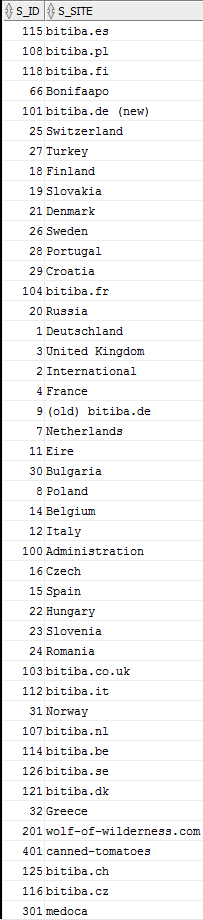

In [48]:
for i in np.sort(data['K_REGISTRATION_S_ID'].unique())[:26]:
    print('                                                SITE ' + str(i) + '                                                           ')
    cus_data = data[data['K_REGISTRATION_S_ID'] == i]
    crosstab = cus_data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()
    crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)
    display(crosstab_rel.style.apply(highlight_max, axis=1))
    crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)
    crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)
    crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100
    crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100
    display(crosstab.fillna(0).astype(int))
    print('Percentage of non-eligible customers with the old routine: ',
          np.round(cus_data[(cus_data['OLD_TIER'] == 0) | (cus_data['OLD_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('Percentage of non-eligible customers with the new routine: ',
          np.round(cus_data[(cus_data['NEW_TIER'] == 0) | (cus_data['NEW_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('_______________________________________________________________________________________________________________________')
    print('')

                                                SITE 1                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,73.78,19.22,0.8,4.01,2.1,0.08,0,0,0
4.0,9.45,55.02,21.4,14.05,0.05,0.01,0.01,0,0
5.0,7.65,15.41,52.81,24.05,0,0.08,0,0,0
6.0,35.92,0.08,0.05,63.94,0.01,0,0,0,0
24.0,9.32,0.25,0.1,14.75,58.16,17.42,0,0,0
25.0,6.69,0.1,0.39,21.37,12.76,58.7,0,0,0
1000.0,12.07,5.17,3.45,27.59,0,0,51.72,0,0
1004.0,15.38,7.69,0,0,0,0,0,53.85,23.08
1005.0,11.11,0,0,0,0,0,0,55.56,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,459866,119794,5001,24981,13099,488,27,20,0,623276,30
4.0,46499,270586,105263,69108,255,49,29,18,1,491808,23
5.0,22441,45203,154954,70551,13,233,2,2,1,293400,14
6.0,218706,494,287,389290,49,22,0,0,0,608848,29
24.0,3371,89,37,5336,21041,6303,0,0,0,36177,1
25.0,878,13,51,2806,1676,7709,0,0,0,13133,0
1000.0,7,3,2,16,0,0,30,0,0,58,0
1004.0,4,2,0,0,0,0,0,14,6,26,0
1005.0,1,0,0,0,0,0,0,5,3,9,0


Percentage of non-eligible customers with the old routine:  30.16
Percentage of non-eligible customers with the new routine:  36.37
_______________________________________________________________________________________________________________________

                                                SITE 2                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,84.68,12.43,0.57,2.15,0.08,0,0.02,0.08,0
4.0,17,49.6,22.9,10.25,0.03,0.03,0.15,0.03,0
5.0,19.15,15.69,53.58,11.52,0,0,0,0.06,0
6.0,64.81,0.09,0.05,35.04,0,0,0,0,0
24.0,8.33,0,0,12.5,33.33,45.83,0,0,0
25.0,4.55,0,9.09,0,4.55,81.82,0,0,0
1000.0,0,9.09,18.18,27.27,0,0,45.45,0,0
1004.0,66.67,0,0,0,0,0,0,33.33,0
1005.0,0,0,0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,4183,614,28,106,4,0,1,4,0,4940,34
4.0,559,1631,753,337,1,1,5,1,0,3288,23
5.0,326,267,912,196,0,0,0,1,0,1702,11
6.0,2741,4,2,1482,0,0,0,0,0,4229,29
24.0,2,0,0,3,8,11,0,0,0,24,0
25.0,1,0,2,0,1,18,0,0,0,22,0
1000.0,0,1,2,3,0,0,5,0,0,11,0
1004.0,4,0,0,0,0,0,0,2,0,6,0
1005.0,0,0,0,0,0,0,0,0,2,2,0


Percentage of non-eligible customers with the old routine:  34.73
Percentage of non-eligible customers with the new routine:  54.95
_______________________________________________________________________________________________________________________

                                                SITE 3                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,69.86,27.82,1.3,1.02,0,0,0,0
4.0,24.16,23.86,46,5.97,0,0,0,0
5.0,28.07,12.52,50.97,8.43,0,0,0,0
6.0,84.26,0.05,0.06,15.64,0,0,0,0
24.0,0,16.67,0,0,41.67,41.67,0,0
25.0,14.29,0,7.14,7.14,7.14,64.29,0,0
1000.0,0,0,12.5,25,0,0,62.5,0
1004.0,33.33,0,0,0,0,0,0,66.67
1005.0,100,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,247831,98693,4599,3611,3,1,1,3,354742,46
4.0,24613,24312,46869,6086,0,2,5,2,101889,13
5.0,14107,6293,25614,4235,1,0,1,0,50251,6
6.0,215804,123,151,40045,0,0,0,0,256123,33
24.0,0,2,0,0,5,5,0,0,12,0
25.0,2,0,1,1,1,9,0,0,14,0
1000.0,0,0,1,2,0,0,5,0,8,0
1004.0,2,0,0,0,0,0,0,4,6,0
1005.0,1,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  46.49
Percentage of non-eligible customers with the new routine:  65.84
_______________________________________________________________________________________________________________________

                                                SITE 4                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,72.21,22.36,0.23,2.13,0,0,0,3.06,0.01
4.0,16.56,53.68,20.34,7.48,0,0,0,1.66,0.28
5.0,26.74,10.44,54.37,7.68,0,0,0,0.45,0.32
6.0,71.58,0.11,0.06,28.24,0,0,0,0.01,0
24.0,6.25,12.5,6.25,12.5,43.75,18.75,0,0,0
25.0,0,0,0,60,20,20,0,0,0
1000.0,0,25,0,25,0,0,50,0,0
1004.0,20.48,2.29,0.35,0.67,0,0,0,70.84,5.37
1005.0,18.65,1.66,1.8,1.85,0,0,0,39.99,36.05


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,337267,104423,1086,9953,0,0,3,14295,51,467078,33
4.0,54810,177714,67322,24768,0,0,2,5484,933,331033,23
5.0,43710,17063,88870,12548,0,0,0,738,526,163455,11
6.0,305168,479,269,120374,0,0,0,35,4,426329,30
24.0,1,2,1,2,7,3,0,0,0,16,0
25.0,0,0,0,3,1,1,0,0,0,5,0
1000.0,0,1,0,1,0,0,2,0,0,4,0
1004.0,2170,243,37,71,0,0,0,7506,569,10596,0
1005.0,787,70,76,78,0,0,0,1687,1521,4219,0


Percentage of non-eligible customers with the old routine:  33.3
Percentage of non-eligible customers with the new routine:  53.03
_______________________________________________________________________________________________________________________

                                                SITE 7                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,80.09,15.54,0.46,2.46,0,0,1.45,0,0
4.0,16.71,54.02,17.24,7.9,0,0,4.12,0,0
5.0,24.79,10.58,56.37,7.47,0,0,0.78,0,0
6.0,71.07,0.1,0.09,28.73,0,0,0.01,0,0
24.0,12.5,0,0,12.5,43.75,25,6.25,0,0
25.0,10,10,20,0,20,40,0,0,0
1000.0,13.64,5.87,1.21,29.05,0,0,50.23,0,0
1004.0,0,0,0,0,0,0,0,66.67,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,201902,39173,1163,6199,1,0,3657,1,0,252096,32
4.0,31332,101292,32335,14822,0,0,7723,0,1,187505,23
5.0,26832,11448,61008,8086,0,0,846,0,0,108220,13
6.0,157986,215,205,63870,0,0,26,0,0,222302,28
24.0,2,0,0,2,7,4,1,0,0,16,0
25.0,1,1,2,0,2,4,0,0,0,10,0
1000.0,2302,991,204,4905,0,0,8481,0,0,16883,2
1004.0,0,0,0,0,0,0,0,2,1,3,0
SUM_NEW_TIER,420357,153120,94917,97884,10,8,20734,3,2,787035,100


Percentage of non-eligible customers with the old routine:  32.03
Percentage of non-eligible customers with the new routine:  53.41
_______________________________________________________________________________________________________________________

                                                SITE 8                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0
OLD_TIER,,,,,,,
0.0,88.52,9.61,0.51,1.36,0,0,0
4.0,16.13,53.63,25.55,4.68,0,0,0
5.0,13.25,7.64,72.97,6.14,0,0,0
6.0,68.28,0.1,0.12,31.5,0,0,0
24.0,7.69,23.08,0,15.38,38.46,15.38,0
25.0,25,0,0,25,0,50,0
1000.0,50,12.5,0,0,0,0,37.5


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,217978,23660,1249,3352,3,0,2,246244,39
4.0,23909,79488,37865,6943,1,0,2,148208,23
5.0,6598,3802,36326,3057,0,0,1,49784,8
6.0,120979,174,217,55807,0,0,1,177178,28
24.0,1,3,0,2,5,2,0,13,0
25.0,1,0,0,1,0,2,0,4,0
1000.0,4,1,0,0,0,0,3,8,0
SUM_NEW_TIER,369470,107128,75657,69162,9,4,9,621439,100
NEW_DIST%,59,17,12,11,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  39.62
Percentage of non-eligible customers with the new routine:  59.45
_______________________________________________________________________________________________________________________

                                                SITE 9                                                           


NEW_TIER,0.0
OLD_TIER,
0.0,100


NEW_TIER,0.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,
0.0,1,1,100
SUM_NEW_TIER,1,1,100
NEW_DIST%,100,100,10000


Percentage of non-eligible customers with the old routine:  100.0
Percentage of non-eligible customers with the new routine:  100.0
_______________________________________________________________________________________________________________________

                                                SITE 11                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,86.45,8.62,0.2,4.71,0.01,0,0.01
4.0,18.82,65.77,5.67,9.72,0.01,0,0.01
5.0,27.87,15.51,48.2,8.42,0,0,0
6.0,65.11,0.15,0.01,34.73,0,0,0
24.0,25,0,0,0,25,50,0
25.0,0,0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,9934,991,23,541,1,0,1,11491,32
4.0,1533,5358,462,792,1,0,1,8147,22
5.0,728,405,1259,220,0,0,0,2612,7
6.0,8851,20,2,4721,0,0,0,13594,37
24.0,1,0,0,0,1,2,0,4,0
25.0,0,0,0,0,0,1,0,1,0
SUM_NEW_TIER,21047,6774,1746,6274,3,3,2,35849,100
NEW_DIST%,58,18,4,17,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  32.05
Percentage of non-eligible customers with the new routine:  58.71
_______________________________________________________________________________________________________________________

                                                SITE 12                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,71.09,26.4,0.38,2.13,0,0,0,0
4.0,13.71,48.25,29.79,8.24,0,0,0,0
5.0,22.46,12.1,57.12,8.31,0,0,0,0
6.0,70.38,0.11,0.07,29.44,0,0,0,0
24.0,19.05,33.33,4.76,23.81,14.29,4.76,0,0
25.0,0,0,0,33.33,16.67,50,0,0
1000.0,0,0,0,100,0,0,0,0
1004.0,0,0,0,0,0,0,0,100
1005.0,66.67,0,0,0,0,0,0,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,162007,60157,861,4855,1,0,0,0,227881,36
4.0,20200,71085,43894,12144,0,0,0,0,147323,23
5.0,14574,7855,37068,5395,0,0,1,1,64894,10
6.0,135576,215,131,56708,0,0,0,0,192630,30
24.0,4,7,1,5,3,1,0,0,21,0
25.0,0,0,0,2,1,3,0,0,6,0
1000.0,0,0,0,1,0,0,0,0,1,0
1004.0,0,0,0,0,0,0,0,2,2,0
1005.0,2,0,0,0,0,0,0,1,3,0


Percentage of non-eligible customers with the old routine:  36.01
Percentage of non-eligible customers with the new routine:  52.53
_______________________________________________________________________________________________________________________

                                                SITE 14                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,77.57,20.25,0.22,1.85,0,0,0.03,0.08,0
4.0,11.61,54.96,24.44,8.82,0,0,0.09,0.06,0.01
5.0,21.66,13.54,57.2,7.53,0,0,0.03,0.03,0.01
6.0,65.51,0.21,0.1,34.18,0,0,0,0,0
24.0,28.57,14.29,14.29,14.29,28.57,0,0,0,0
25.0,0,0,0,0,0,100,0,0,0
1000.0,13.33,6.67,2.22,17.78,0,0,60,0,0
1004.0,14.29,2.38,0,0,0,0,0,80.95,2.38
1005.0,36.36,0,0,4.55,0,0,0,27.27,31.82


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,38864,10144,110,927,0,0,15,41,0,50101,38
4.0,3456,16355,7272,2624,1,0,28,17,4,29757,22
5.0,3254,2035,8593,1132,0,0,4,5,1,15024,11
6.0,22566,72,35,11776,0,0,0,0,0,34449,26
24.0,2,1,1,1,2,0,0,0,0,7,0
25.0,0,0,0,0,0,1,0,0,0,1,0
1000.0,6,3,1,8,0,0,27,0,0,45,0
1004.0,6,1,0,0,0,0,0,34,1,42,0
1005.0,8,0,0,1,0,0,0,6,7,22,0


Percentage of non-eligible customers with the old routine:  38.7
Percentage of non-eligible customers with the new routine:  52.66
_______________________________________________________________________________________________________________________

                                                SITE 15                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,79.1,17.14,0.83,2.93,0,0,0,0,0
4.0,20.28,35.69,35.53,8.5,0,0,0,0,0
5.0,29.43,8.12,52.76,9.69,0,0,0,0,0
6.0,68.24,0.1,0.1,31.57,0,0,0,0,0
24.0,0,25,12.5,25,25,12.5,0,0,0
25.0,12.5,0,0,0,12.5,75,0,0,0
1000.0,40,0,0,0,0,0,60,0,0
1004.0,50,0,16.67,0,0,0,0,33.33,0
1005.0,100,0,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,145033,31429,1521,5372,5,0,0,2,1,183363,38
4.0,21444,37738,37571,8992,1,1,1,1,0,105749,21
5.0,12657,3494,22690,4166,0,1,0,0,0,43008,8
6.0,101839,149,144,47108,0,0,0,0,1,149241,31
24.0,0,2,1,2,2,1,0,0,0,8,0
25.0,1,0,0,0,1,6,0,0,0,8,0
1000.0,2,0,0,0,0,0,3,0,0,5,0
1004.0,3,0,1,0,0,0,0,2,0,6,0
1005.0,1,0,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  38.09
Percentage of non-eligible customers with the new routine:  58.37
_______________________________________________________________________________________________________________________

                                                SITE 16                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,74.56,21.22,0.4,3.82,0,0
4.0,11.84,62.14,17.05,8.97,0,0
5.0,18.27,7.46,65.48,8.79,0,0
6.0,59.86,0.08,0.04,40.02,0,0
24.0,33.33,0,16.67,0,33.33,16.67
25.0,0,0,20,0,40,40


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,53974,15359,291,2765,1,1,72391,29
4.0,6629,34785,9546,5022,0,0,55982,22
5.0,4188,1710,15011,2014,0,0,22923,9
6.0,55147,73,41,36864,0,0,92125,37
24.0,2,0,1,0,2,1,6,0
25.0,0,0,1,0,2,2,5,0
SUM_NEW_TIER,119940,51927,24891,46665,5,4,243432,100
NEW_DIST%,49,21,10,19,0,0,100,0


Percentage of non-eligible customers with the old routine:  29.74
Percentage of non-eligible customers with the new routine:  49.27
_______________________________________________________________________________________________________________________

                                                SITE 18                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,84.35,12.22,0.28,3.15,0
4.0,17.1,55.81,16.23,10.85,0
5.0,23.48,13.96,49.77,12.79,0
6.0,65.12,0.11,0.07,34.7,0
24.0,0,0,0,0,100
25.0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,32072,4648,106,1198,0,38024,26
4.0,6641,21669,6303,4214,0,38827,26
5.0,4589,2729,9727,2500,0,19545,13
6.0,32338,53,33,17232,0,49656,33
24.0,0,0,0,0,1,1,0
25.0,0,0,0,1,0,1,0
SUM_NEW_TIER,75640,29099,16169,25145,1,146054,100
NEW_DIST%,51,19,11,17,0,100,0


Percentage of non-eligible customers with the old routine:  26.03
Percentage of non-eligible customers with the new routine:  51.79
_______________________________________________________________________________________________________________________

                                                SITE 19                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,72.66,25.85,0.55,0.91,0.04,0
4.0,19.22,45.96,30.2,4.56,0.05,0
5.0,26.48,5.31,62.46,5.75,0,0
6.0,86.98,0.08,0.04,12.9,0,0
24.0,10.71,3.57,3.57,7.14,39.29,35.71
25.0,11.11,0,27.78,0,11.11,50


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,13373,4757,101,167,7,0,18405,29
4.0,2148,5136,3375,509,6,0,11174,17
5.0,1666,334,3930,362,0,0,6292,10
6.0,22998,21,11,3412,0,0,26442,42
24.0,3,1,1,2,11,10,28,0
25.0,2,0,5,0,2,9,18,0
SUM_NEW_TIER,40190,10249,7423,4452,26,19,62359,100
NEW_DIST%,64,16,11,7,0,0,100,0


Percentage of non-eligible customers with the old routine:  29.51
Percentage of non-eligible customers with the new routine:  64.45
_______________________________________________________________________________________________________________________

                                                SITE 20                                                           


NEW_TIER,0.0,4.0,5.0,6.0,1004.0
OLD_TIER,,,,,
0.0,93.36,3.11,0.04,3.49,0
4.0,32.94,57.05,2.13,7.88,0
5.0,24.78,2.95,67.26,5.01,0
6.0,44.41,0,0.09,55.5,0
1004.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,2490,83,1,93,0,2667,41
4.0,418,724,27,100,0,1269,19
5.0,84,10,228,17,0,339,5
6.0,986,0,2,1232,0,2220,34
1004.0,0,0,0,0,1,1,0
SUM_NEW_TIER,3978,817,258,1442,1,6496,100
NEW_DIST%,61,12,3,22,0,100,1


Percentage of non-eligible customers with the old routine:  41.06
Percentage of non-eligible customers with the new routine:  61.24
_______________________________________________________________________________________________________________________

                                                SITE 21                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0
OLD_TIER,,,,,
0.0,74.47,23.24,0.24,2.05,0
4.0,16.69,57.94,18.43,6.94,0
5.0,24.75,11.45,57.59,6.21,0
6.0,79.11,0.14,0.12,20.63,0
24.0,50,0,0,0,50
25.0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,40479,12633,128,1114,0,54354,26
4.0,7643,26542,8444,3178,0,45807,22
5.0,7124,3296,16578,1788,0,28786,14
6.0,59366,104,91,15482,0,75043,36
24.0,2,0,0,0,2,4,0
25.0,0,0,0,1,0,1,0
SUM_NEW_TIER,114614,42575,25241,21563,2,203995,100
NEW_DIST%,56,20,12,10,0,100,0


Percentage of non-eligible customers with the old routine:  26.64
Percentage of non-eligible customers with the new routine:  56.18
_______________________________________________________________________________________________________________________

                                                SITE 22                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,76.34,21.65,0.87,1.13,0.02,0,0
4.0,14.87,36.37,44.8,3.95,0.01,0,0.01
5.0,22.03,5.02,69.58,3.38,0,0,0
6.0,84.14,0.08,0.09,15.69,0,0,0
24.0,10,0,10,10,35,35,0
25.0,7.69,0,0,7.69,23.08,61.54,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,24156,6850,274,356,6,0,0,31642,34
4.0,1980,4844,5966,526,1,0,1,13318,14
5.0,1199,273,3787,184,0,0,0,5443,5
6.0,35402,34,39,6600,0,0,0,42075,45
24.0,2,0,2,2,7,7,0,20,0
25.0,1,0,0,1,3,8,0,13,0
SUM_NEW_TIER,62740,12001,10068,7669,17,15,1,92511,100
NEW_DIST%,67,12,10,8,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  34.2
Percentage of non-eligible customers with the new routine:  67.82
_______________________________________________________________________________________________________________________

                                                SITE 23                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,84.91,13,0.09,2.01,0,0
4.0,9.84,73.36,9.67,7.12,0,0
5.0,12.86,17.62,64.3,5.21,0,0
6.0,70.31,0.1,0.04,29.55,0,0
24.0,12.5,0,0,12.5,75,0
25.0,0,11.11,11.11,33.33,11.11,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,10582,1620,11,250,0,0,12463,28
4.0,1040,7750,1022,752,0,0,10564,24
5.0,716,981,3579,290,0,0,5566,12
6.0,10742,16,6,4514,0,0,15278,34
24.0,1,0,0,1,6,0,8,0
25.0,0,1,1,3,1,3,9,0
SUM_NEW_TIER,23081,10368,4619,5810,7,3,43888,100
NEW_DIST%,52,23,10,13,0,0,100,0


Percentage of non-eligible customers with the old routine:  28.4
Percentage of non-eligible customers with the new routine:  52.59
_______________________________________________________________________________________________________________________

                                                SITE 24                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,89.97,8.24,0.47,1.33,0,0
4.0,11.87,50.57,33.44,4.12,0,0.01
5.0,14.55,4.25,77.28,3.92,0,0
6.0,82.02,0.08,0.05,17.86,0,0
24.0,0,0,0,40,40,20


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,14427,1321,75,213,0,0,16036,27
4.0,1200,5112,3380,416,0,1,10109,17
5.0,483,141,2565,130,0,0,3319,5
6.0,23759,22,14,5174,0,0,28969,49
24.0,0,0,0,2,2,1,5,0
SUM_NEW_TIER,39869,6596,6034,5935,2,2,58438,100
NEW_DIST%,68,11,10,10,0,0,100,0


Percentage of non-eligible customers with the old routine:  27.44
Percentage of non-eligible customers with the new routine:  68.22
_______________________________________________________________________________________________________________________

                                                SITE 25                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,1005.0
OLD_TIER,,,,,,,,
0.0,93.13,3.21,0.97,2.68,0,0,0,0
4.0,3.84,72.41,10.83,12.91,0,0,0,0.01
5.0,2.35,24.83,57.21,15.6,0,0,0,0.01
6.0,22.98,0.28,0.13,76.62,0,0,0,0
24.0,6.67,40,6.67,20,26.67,0,0,0
25.0,10,10,30,20,0,30,0,0
1004.0,0,0,0,0,0,0,0,100
1005.0,16.67,0,0,0,0,0,16.67,66.67


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,28008,966,291,807,1,0,0,0,30073,20
4.0,1317,24840,3714,4430,0,0,1,4,34306,23
5.0,566,5979,13778,3758,0,0,0,2,24083,16
6.0,12941,156,71,43156,0,0,0,0,56324,38
24.0,1,6,1,3,4,0,0,0,15,0
25.0,1,1,3,2,0,3,0,0,10,0
1004.0,0,0,0,0,0,0,0,2,2,0
1005.0,1,0,0,0,0,0,1,4,6,0
SUM_NEW_TIER,42835,31948,17858,52156,5,3,2,12,144819,100


Percentage of non-eligible customers with the old routine:  20.77
Percentage of non-eligible customers with the new routine:  29.58
_______________________________________________________________________________________________________________________

                                                SITE 26                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,73.41,25.21,0.35,1.03
4.0,16.76,50.2,27.66,5.38
5.0,24.36,8.58,59.76,7.31
6.0,81.26,0.07,0.05,18.62


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,36013,12366,173,504,49056,23
4.0,7593,22743,12530,2439,45305,22
5.0,3249,1144,7972,975,13340,6
6.0,79214,70,45,18155,97484,47
SUM_NEW_TIER,126069,36323,20720,22073,205185,100
NEW_DIST%,61,17,10,10,100,0


Percentage of non-eligible customers with the old routine:  23.91
Percentage of non-eligible customers with the new routine:  61.44
_______________________________________________________________________________________________________________________

                                                SITE 28                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,92.42,2.24,0.01,5.33
4.0,24.48,66.25,1.28,8
5.0,19.52,5.06,71.33,4.1
6.0,59.46,0.25,0.03,40.26


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,9303,225,1,537,10066,28
4.0,1224,3313,64,400,5001,13
5.0,243,63,888,51,1245,3
6.0,11576,48,5,7838,19467,54
SUM_NEW_TIER,22346,3649,958,8826,35779,100
NEW_DIST%,62,10,2,24,100,0


Percentage of non-eligible customers with the old routine:  28.13
Percentage of non-eligible customers with the new routine:  62.46
_______________________________________________________________________________________________________________________

                                                SITE 29                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,85.76,11.76,0.24,2.22,0.01,0
4.0,10.05,71.01,13.98,4.96,0,0
5.0,10.88,6.24,79.37,3.52,0,0
6.0,74.78,0.14,0.07,25.01,0,0
25.0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,6350,871,18,164,1,0,7404,30
4.0,470,3322,654,232,0,0,4678,19
5.0,232,133,1693,75,0,0,2133,8
6.0,7555,14,7,2527,0,0,10103,41
25.0,0,0,0,0,0,1,1,0
SUM_NEW_TIER,14607,4340,2372,2998,1,1,24319,100
NEW_DIST%,60,17,9,12,0,0,100,0


Percentage of non-eligible customers with the old routine:  30.45
Percentage of non-eligible customers with the new routine:  60.06
_______________________________________________________________________________________________________________________

                                                SITE 30                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,72.99,25.46,0.43,1.13,0
4.0,6.35,58.9,30.54,4.22,0
5.0,11.03,4.8,80.18,3.98,0
6.0,80.02,0.1,0.01,19.87,0
25.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,3761,1312,22,58,0,5153,31
4.0,143,1327,688,95,0,2253,13
5.0,108,47,785,39,0,979,5
6.0,6447,8,1,1601,0,8057,48
25.0,0,0,0,0,1,1,0
SUM_NEW_TIER,10459,2694,1496,1793,1,16443,100
NEW_DIST%,63,16,9,10,0,100,0


Percentage of non-eligible customers with the old routine:  31.34
Percentage of non-eligible customers with the new routine:  63.61
_______________________________________________________________________________________________________________________

                                                SITE 31                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,95.51,1.87,0.05,2.56
4.0,24.41,67.29,1.83,6.47
5.0,14.25,2.93,78.81,4.01
6.0,71.27,0.08,0.05,28.6


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,7045,138,4,189,7376,20
4.0,1091,3008,82,289,4470,12
5.0,277,57,1532,78,1944,5
6.0,15688,18,12,6295,22013,61
SUM_NEW_TIER,24101,3221,1630,6851,35803,100
NEW_DIST%,67,8,4,19,100,0


Percentage of non-eligible customers with the old routine:  20.6
Percentage of non-eligible customers with the new routine:  67.32
_______________________________________________________________________________________________________________________

                                                SITE 32                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,93.5,0.85,0,5.65
4.0,15.58,77.51,1.38,5.52
5.0,4.7,4.7,85.23,5.37
6.0,58.29,0.02,0,41.7


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,2632,24,0,159,2815,27
4.0,79,393,7,28,507,5
5.0,7,7,127,8,149,1
6.0,3862,1,0,2763,6626,65
SUM_NEW_TIER,6580,425,134,2958,10097,100
NEW_DIST%,65,4,1,29,100,0


Percentage of non-eligible customers with the old routine:  27.88
Percentage of non-eligible customers with the new routine:  65.17
_______________________________________________________________________________________________________________________

